## **The Sparks Foundation-GRIP June 2021**
## **TASK1 - Prediction using supervised ML**
## **Author: K.Sarveshwaran**

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **Importing dataset**

In [3]:
#importing dataset
data=pd.read_excel('Marks dataset.xlsx')

## **PRE-PROCESSING OUR DATA SET**

In [4]:
#shape of the data
data.shape

(25, 2)

In [40]:
#info about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [41]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [42]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
#statistics info about our data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


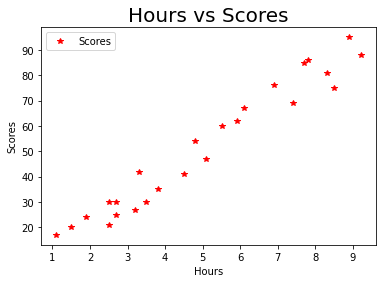

In [8]:
#plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='*',color='red')
plt.xlabel('Hours',fontsize=10)
plt.ylabel('Scores',fontsize=10)
plt.title('Hours vs Scores',fontsize=20)
plt.show()

 From the above plot, we can clearly observe that there is a positive linear relationship between 'no of houres studied' and 'scores'

In [5]:
#dividing our data into attributes(inputs) and labels (outputs)
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [6]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

## Train_test_split

In [24]:
#Importing train_test_split() method  from scikit package
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [25]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [26]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

## Training the algorithm

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print('Training completed')

Training completed


In [28]:
#coefficient 
reg.coef_

array([9.91065648])

In [29]:
#intercept
reg.intercept_

2.018160041434683

## Making the predictions

In [31]:
#predictingg the scores
y_pred=reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

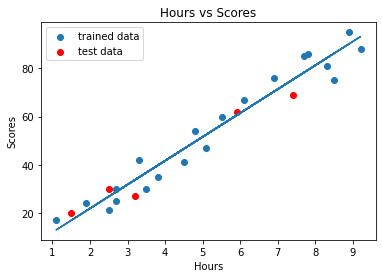

In [58]:
# Plotting the regression line
line=reg.coef_*x+reg.intercept_
#plotting the train and test data 
plt.scatter(x_train,y_train,label='trained data')
plt.scatter(x_test,y_test,label='test data',color='red')
plt.plot(x,line)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()


In [32]:
#comparing the actual and predicted scores
a=pd.DataFrame({'actual':y_test,'Predicted':y_pred})
a

,actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## *Our objective here is to predict if a student studies for 9.25 hours, what will be the score??*

In [36]:
hours=9.25
pred_score=reg.predict([[hours]])
print("no of hours = {}".format(hours))
print("predicted score = {}".format(pred_score[0]))

no of hours = 9.25
predicted score = 93.69173248737538


In [48]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_pred,y_test))
print('Mean squared error:',metrics.mean_squared_error(y_pred,y_test))

Mean absolute error: 4.183859899002975
Mean squared error: 21.5987693072174
